In [ ]:
import networkx as nx
import pandas as pd

g14w_edges = pd.read_csv("https://ona-book.org/data/g14_edgelist.csv")

g14w = nx.from_pandas_edgelist(g14w_edges, source = "from", 
target = "to", edge_attr = True)

In [ ]:
simple_paths = nx.all_simple_paths(G = g14w, source = 9, target = 4)
[path for path in simple_paths]

[[9, 8, 7, 4],
 [9, 8, 7, 6, 4],
 [9, 8, 4],
 [9, 7, 8, 4],
 [9, 7, 4],
 [9, 7, 6, 4]]

In [ ]:
shortest_paths_uw = nx.all_shortest_paths(G = g14w, source = 9, 
target = 4)
[path for path in shortest_paths_uw]

[[9, 8, 4], [9, 7, 4]]

In [ ]:
# weighted shorted path
shortest_paths_w = nx.all_shortest_paths(G = g14w, source = 9, 
target = 4, weight = 'weight')
[path for path in shortest_paths_w]

[[9, 8, 4], [9, 7, 4], [9, 8, 7, 4]]

In [ ]:
# shortest_path function only for undirected graph
shortest_paths_from9 = nx.shortest_path(g14w, source = 9, 
weight = 'weight')

# view one path to vertex 11
shortest_paths_from9.get(11)

[9, 10, 11]

In [ ]:
# for directed graphs, generate dictionary or tuple of all distance from source to destination
distances_from9 = nx.shortest_path_length(g14w, source = 9, 
weight = 'weight')
distances_from9

{1: 6,
 2: 6,
 3: 6,
 4: 5,
 5: 7,
 6: 5,
 7: 3,
 8: 2,
 9: 0,
 10: 4,
 11: 5,
 12: 5,
 13: 3,
 14: 5}

In [ ]:
# Average distance
nx.average_shortest_path_length(g14w, weight = 'weight')

6.208791208791209

In [ ]:
# unweighted diameter
nx.diameter(g14w)

5

In [ ]:
# weighted diameter
# max value of weighted distances of all pairs
distances = nx.shortest_path_length(g14w, weight = 'weight')
max([max(distance[1].values()) for distance in distances])

12

In [ ]:
# edge density
nx.density(g14w)

0.1978021978021978

# Use Case

The `workfrance` data set contains information captured in an experimental study in an office building in France. Vertices in this data set represent individual employees, and edges exist between employees if they have spent a minimum amount of time together in the same place in the building.

In [ ]:
# download workfrance data sets
workfrance_edges = pd.read_csv(
    "https://ona-book.org/data/workfrance_edgelist.csv"
)
workfrance_vertices = pd.read_csv(
    "https://ona-book.org/data/workfrance_vertices.csv"
)

In [ ]:
workfrance_edges.head()

,from,to,mins
0,3,159,8
1,3,253,14
2,3,447,17
3,3,498,10
4,3,694,7


In [ ]:
workfrance_vertices.head()

,id,dept
0,89,DCAR
1,97,DCAR
2,118,DCAR
3,220,DCAR
4,378,DCAR


In [ ]:
# create graph

workfrance = nx.from_pandas_edgelist(workfrance_edges, source = "from", 
target = "to", edge_attr = True)

dept_attr = workfrance_vertices.set_index('id').to_dict(orient = 'index')
nx.set_node_attributes(G = workfrance, values = dept_attr)

In [ ]:
[workfrance.nodes[i]['dept'] for i in list(workfrance.nodes)][0:5]

['DMI', 'DMI', 'DISQ', 'DMI', 'DMI']

In [ ]:
[workfrance.edges[i]['mins'] for i in list(workfrance.edges)][0:5]

[8, 14, 17, 10, 7]

In [ ]:
print(f'no. of nodes: {len(workfrance.nodes)}')
print(f'no. of edges: {len(workfrance.edges)}')

no. of nodes: 211
no. of edges: 932


## Facilitating Introductions in Workplace

A simple use case of shortest paths is to help connect individuals via common connections or intermediaries. Let’s take two vertices from our workfrance graph who are from different departments. Let’s select Vertices 3 and 55. Let’s see what departments they are in.

In [ ]:
[workfrance.nodes[i]['dept'] for i in [3, 55]]

['DMI', 'SSI']

Now let’s determine the unweighted distance between these two employees in the network.

In [ ]:
nx.shortest_path_length(workfrance, source = 3).get(55)

2

These two individuals have an unweighted distance of 2 in the network, meaning they can connect through one intermediary. Now we determine who the common intermediary is.

In [ ]:
[path for path in nx.all_shortest_paths(G = workfrance, source = 3, target = 55)]

[[3, 447, 55]]

There is one common intermediary: employee 447. Therefore, if employees 3 and 55 do not know each other, employee 447 may be able to introduce them. Note that there may be more than one suggestion for intermediaries. For example:

In [ ]:
[path for path in nx.all_shortest_paths(G = workfrance, source = 3, target = 290)]

[[3, 694, 290], [3, 859, 290]]

In this case, we could consider using the edge weights to rank the intermediary options, on the basis that higher weights may indicate stronger connections. Let’s visualize these two options by looking at the subgraph with edge weights.

In [ ]:
shortest_paths_3_290 = [path for path in nx.all_shortest_paths(G = workfrance, source = 3, target = 290)]
nodes_paths_3_290 = list(set([i for path in shortest_paths_3_290 for i in path]))
nodes_paths_3_290

[859, 290, 3, 694]

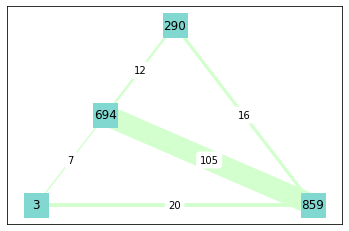

In [ ]:
import numpy as np

np.random.seed(3005)

subgraph = workfrance.subgraph(nodes_paths_3_290)
list_mins = [subgraph.edges[i]['mins'] for i in list(subgraph.edges)]

edgelabel = nx.draw_networkx_edge_labels(subgraph, 
                             pos=nx.planar_layout(subgraph),
                             rotate = False,
                             edge_labels = dict(zip(list(subgraph.edges), list_mins)))

main_draw = nx.draw_networkx(subgraph,
                             nx.planar_layout(subgraph),
                             node_size = 600,
                             node_shape = 's',
                             node_color = '#81d8d0',
                             edge_color = '#d3ffce',
                             width = [i/5 for i in list_mins])

Here we may recommend employee 859 first on the basis of higher edge weights and therefore possibly greater familiarity with employees 3 and 290.

## Finding distant colleagues in a workplace

Now, imagine that a professional event is being organized in the office building in France, where employees will be assigned to one of 21 tables of ten people. You have been asked to try to help ensure that the tables contain a good mix of individuals and to avoid tables where everyone knows each other very well.

Before we start, we should check whether this graph has any disconnected components.

In [ ]:
nx.is_connected(workfrance)

True

So there are no disconnected components in this graph. Let’s also look at the diameter of this graph to get a sense of the maximum possible distance between any pair of individuals.

In [ ]:
nx.diameter(workfrance)

6

As a first step, we can pick 21 people who have an unweighted distance of 1 from each other and sit them all at a different table. That would certainly be a good starting point.

In [ ]:
# build a dict of node:neighbor
neighbors = dict(zip(workfrance.nodes, 
                     [len([n for n in workfrance[i]]) 
                     for i in workfrance.nodes]))

In [ ]:
print(f'customer no. {max(neighbors, key=neighbors.get)} ' +
      f'has the max neighbors which is {max(list(neighbors.values()))}.')

customer no. 603 has the max neighbors which is 28.


We could pick any 20 from the neighbors of employee 603 and that would be a great starting point for our 21 tables. Let’s pick those with the highest mins property (assuming that this represents a closer relationship).

In [ ]:
# generate list of neighbors ids for ppl 603
id_603_neighbors = [n for n in workfrance[603]]

# create list of tuples of (603,603's neighbor)
tup_603_neighbors = zip([603] * len(id_603_neighbors), id_603_neighbors)

# generate dictionary of neighborId:minsW/neighbor
dict_603_neighbors_mins = zip(id_603_neighbors,
                                   [workfrance.edges[i]['mins'] 
                                    for i in tup_603_neighbors])

In [ ]:
sorted_dict_603_neighbors_mins = sorted(dict_603_neighbors_mins, 
                                        key = lambda x:x[1])
sorted_dict_603_neighbors_mins[-20:]

In [ ]:
# Method 2
dict_test = dict(zip(zip(workfrance_edges['from'].values, workfrance_edges['to'].values), workfrance_edges['mins'].values))
test_key = [i for i in dict_test if 603 in i]
test_val = [dict_test[j] for j in test_key]
sorted(list(zip(test_key, test_val)), key = lambda x:x[1])[-20:]

Here we had different results from the ebook https://ona-book.org/paths-distance.html#calculating-in-python

We then look at the departments of the individuals

In [ ]:
top20_603neighbors = [i[0] for i in sorted_dict_603_neighbors_mins[-20:]]

In [ ]:
[workfrance.nodes[i]['dept'] for i in top20_603neighbors]

We see some considerable department similarity, which makes sense. Now that we have found the first person for each table, we will want to try to make sure that we sit that person with nine other people who have some distance from them, and to minimize neighbors sitting at the same table. Let’s start with our first employee 603, and call this Table 1. Because there are only 21 tables but employee 603 has 28 neighbors, we might be willing to allow one neighbor to sit at Table 1. Let’s sit them with the neighbor with whom they spent the least minutes.

In [ ]:
sorted_dict_603_neighbors_mins[0]

(77, 5)

So we will sit employee 603 with employee 77. Now we can select a third individual who has a reasonable distance in the network from both employee 603 and employee 77. We could use the mean of the distances to decide on the person with the furthest distance (*non-weighted because uncommonality is inversely prop. with the mins*) from those already selected. 

In [ ]:
workfrance_shortest_paths = dict(nx.all_pairs_shortest_path_length(workfrance))
mean_distance = list(zip(list(workfrance.nodes),
                    [(workfrance_shortest_paths[603][i] + workfrance_shortest_paths[77][i])/2 
                     for i in list(workfrance.nodes)]))

In [ ]:
sorted(mean_distance, key = lambda x:x[1])[-1]

(502, 4.0)

We can select employee 502 for the third seat, and we iterate to find the remainder of the people at the table. In this iteration, we make sure that the same person does not arise twice in the calculations.

In [ ]:
table1 = [603, 77, 502]
workfrance_shortest_paths = dict(nx.all_pairs_shortest_path_length(workfrance))

# complete remainder of table
for x in range(4, 11):
    mean_distance = []
    
    for i in [i for i in list(workfrance.nodes) if i not in table1]:
      sum_vals = []

      for j in table1:
        sum_vals.append(workfrance_shortest_paths[j][i])
      
      sum_val = sum(sum_vals)
      mean_val = sum_val/len(table1)

      mean_distance.append((i, mean_val))

    table1.append(sorted(mean_distance, key = lambda x:x[1])[-1][0])

table1

[603, 77, 502, 533, 496, 970, 677, 165, 977, 38]

take a look at where our members of Table 1 appear

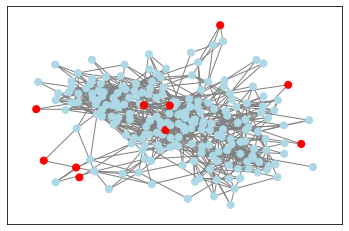

In [ ]:
# set seed for reproducibility
np.random.seed(3005)

colors = ["red" if i in table1 else "lightblue" for i in workfrance.nodes]

# circular layout
nx.draw_networkx(workfrance, node_color = colors,
                 pos = nx.spring_layout(workfrance),
                 node_size = 50,
                 with_labels = False,
                 edge_color = "grey")

It looks as if we have done a good job of maximizing for distance in the network in our Table 1 selection. Let’s check the average distance among the employees at Table 1.

In [ ]:
import itertools

workfrance_shortest_paths = dict(nx.all_pairs_shortest_path_length(workfrance))

all_dist = []
for i,j in itertools.combinations(table1, 2):
  all_dist.append(workfrance_shortest_paths[i][j])

sum(all_dist)/(len(all_dist))

4.4

Given that the diameter of the graph is 6, and that we decided to include a pair of individuals with a distance of 1 on this table, a mean distance of 4.4 seems pretty good. Let’s look at the department mix of our ten people at Table 1.

In [ ]:
list(set([workfrance.nodes[i]['dept'] for i in table1]))

['DG', 'DSE', 'DST', 'SSI', 'DMI', 'SFLE', 'DMCT']

We have seven departments represented at a table of ten, which seems another good indication of a diverse table.